# Homework Assignment 3 by Raymond Daley

This is the initail copy of code from Chapter 4

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

1) Change the model to use one hidden (aka "representation") layer, and see how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book).  Repeat this for three hidden layers.  Comment on any differences you find, as well as what you'd expect.
## Part 1

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-10-10 16:23:21.830408: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 2s 33ms/step - loss: 0.5015 - accuracy: 0.7990 - val_loss: 0.3972 - val_accuracy: 0.8580
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3196 - accuracy: 0.9020 - val_loss: 0.3280 - val_accuracy: 0.8788
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2493 - accuracy: 0.9226 - val_loss: 0.2916 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2031 - accuracy: 0.9383 - val_loss: 0.2813 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1723 - accuracy: 0.9491 - val_loss: 0.2863 - val_accuracy: 0.8832
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1487 - accuracy: 0.9558 - val_loss: 0.2832 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1320 - accuracy: 0.9629 - val_loss: 0.2794 - val_accuracy: 0.8876
Epoch 8/20
30/30 [======

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


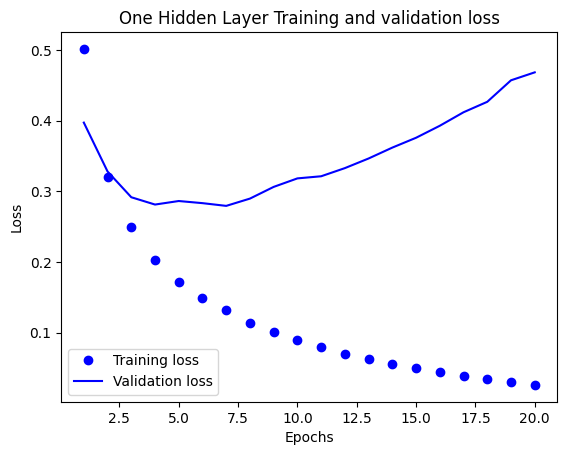

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("One Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

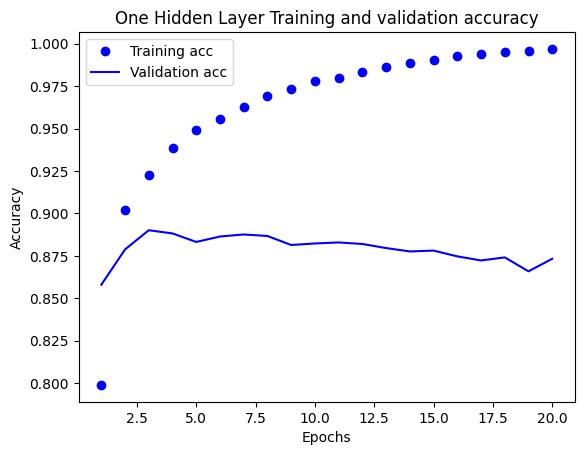

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("One Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Part 2 

In [13]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5283 - accuracy: 0.7841 - val_loss: 0.3919 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3051 - accuracy: 0.9014 - val_loss: 0.3205 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2175 - accuracy: 0.9267 - val_loss: 0.2745 - val_accuracy: 0.8924
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1645 - accuracy: 0.9447 - val_loss: 0.2900 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1356 - accuracy: 0.9545 - val_loss: 0.2900 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1079 - accuracy: 0.9659 - val_loss: 0.3358 - val_accuracy: 0.8765
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0867 - accuracy: 0.9743 - val_loss: 0.3332 - val_accuracy: 0.8821
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


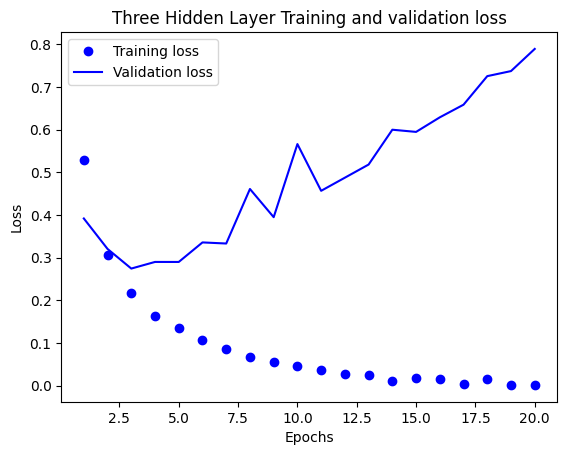

In [17]:
history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Three Hidden Layer Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

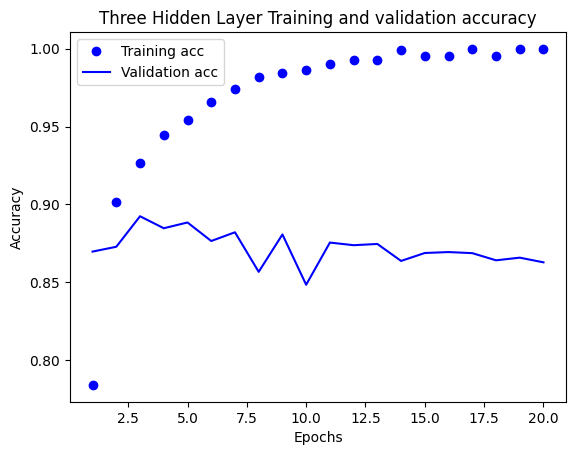

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Three Hidden Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2) Try changing the number of nodes in the hidden layers to 100.  See how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book). 
## Part 1

In [19]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [20]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4676 - accuracy: 0.7762 - val_loss: 0.3314 - val_accuracy: 0.8782
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2568 - accuracy: 0.9104 - val_loss: 0.2929 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1968 - accuracy: 0.9306 - val_loss: 0.2735 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1541 - accuracy: 0.9457 - val_loss: 0.3240 - val_accuracy: 0.8723
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1220 - accuracy: 0.9616 - val_loss: 0.2909 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1006 - accuracy: 0.9688 - val_loss: 0.3582 - val_accuracy: 0.8719
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0828 - accuracy: 0.9757 - val_loss: 0.3290 - val_accuracy: 0.8799
Epoch 8/20
30

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


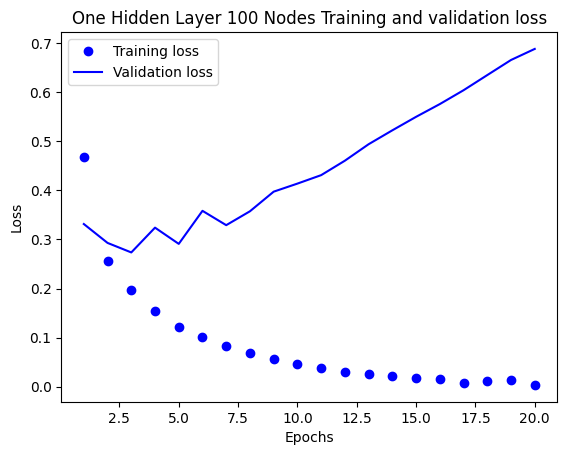

In [23]:

history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("One Hidden Layer 100 Nodes Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

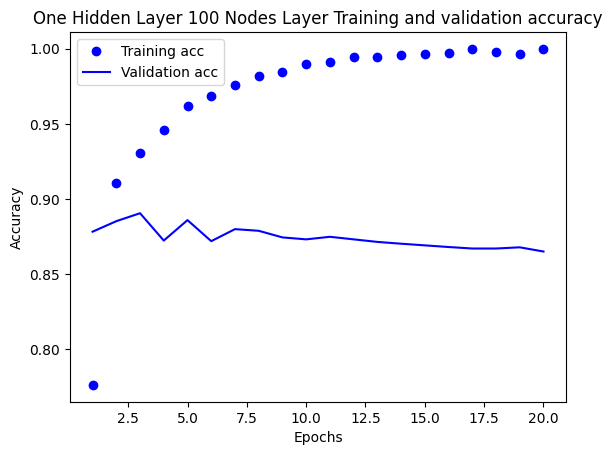

In [24]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("One Hidden Layer 100 Nodes Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Part 2

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [26]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5077 - accuracy: 0.7861 - val_loss: 0.3820 - val_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2977 - accuracy: 0.9002 - val_loss: 0.3009 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2136 - accuracy: 0.9287 - val_loss: 0.2772 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1633 - accuracy: 0.9469 - val_loss: 0.2858 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1289 - accuracy: 0.9575 - val_loss: 0.2998 - val_accuracy: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1035 - accuracy: 0.9683 - val_loss: 0.3827 - val_accuracy: 0.8631
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0857 - accuracy: 0.9755 - val_loss: 0.4492 - val_accuracy: 0.8551
Epoch 8/20
30/30

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<class 'list'>


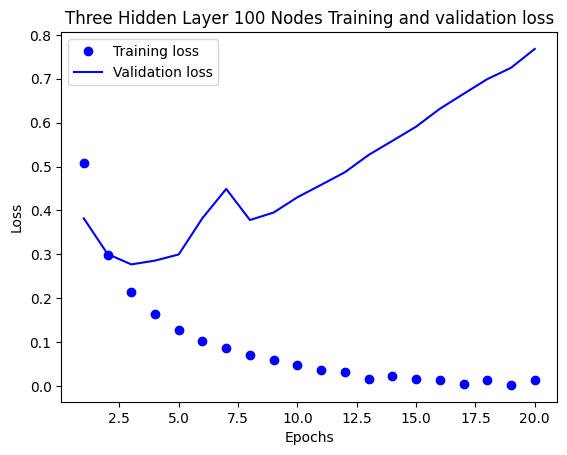

In [29]:

history_dict = history.history
loss_values = history_dict["loss"]
print(type(loss_values))
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Three Hidden Layer 100 Nodes Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

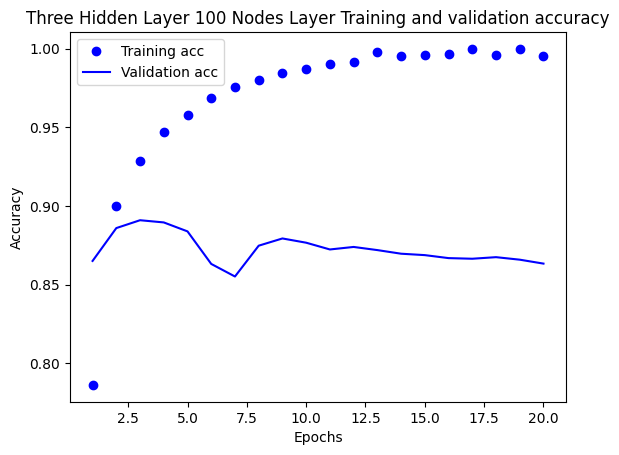

In [30]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Three Hidden Layer 100 Nodes Layer Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3) Evaluate the test accuracy of the model before any training has taken place.  Compare this to the accuracy post-training, and comment on whether or not this is what you'd expect.

## Part 1(a): One Hidden Layer 16 Nodes Pre Training    

In [51]:
pretraining_data = []
posttraining_data = []
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_1_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_1_a[1])
print (part_1_a)

782/782 [==============================] - 1s 740us/step - loss: 0.6952 - accuracy: 0.4979
[0.6952444314956665, 0.4979200065135956]


782/782 [==============================] - 1s 749us/step


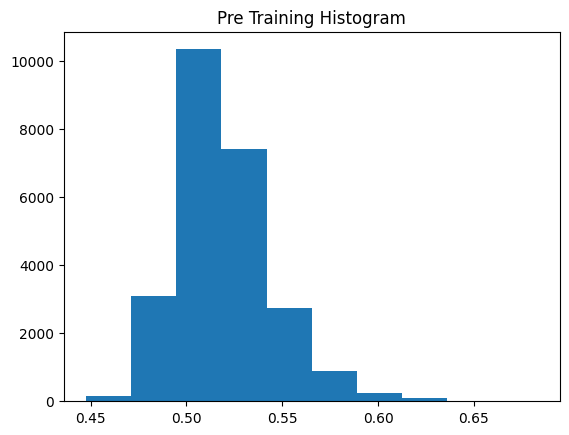

In [53]:
pre_prediction = model.predict(x_test)
plt.hist(pre_prediction, bins=10)
plt.gca().set(title='Pre Training Histogram');

## Part 1(b): One Hidden Layer 16 Nodes After Training

In [54]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_1_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_1_b[1])
print(part_1_b)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4740 - accuracy: 0.8272
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2916 - accuracy: 0.9059
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2289 - accuracy: 0.9219
Epoch 4/4
782/782 [==============================] - 1s 741us/step - loss: 0.2817 - accuracy: 0.8874
[0.2817467153072357, 0.887440025806427]


782/782 [==============================] - 1s 662us/step


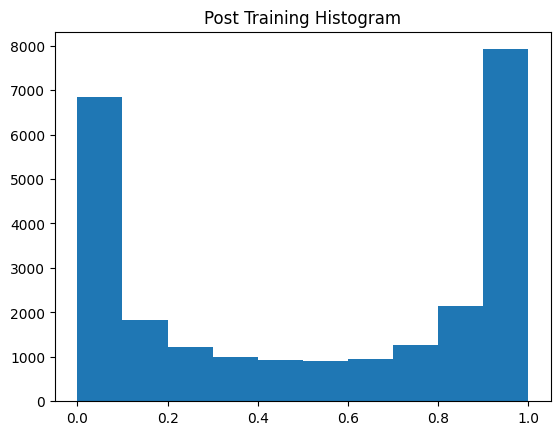

In [55]:
post_prediction = model.predict(x_test)
plt.hist(post_prediction, bins=10)
plt.gca().set(title='Post Training Histogram');

## Part 2(a): Three Hidden Layers 16 Nodes Pre Training

In [36]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_2_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_2_a[1])
print (part_2_a)

782/782 [==============================] - 1s 798us/step - loss: 0.6939 - accuracy: 0.4976
[0.6938503384590149, 0.4976400136947632]


## Part 2(b): Three Hidden Layers 16 Nodes After Training

In [37]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_2_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_2_b[1])
print(part_2_b)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4608 - accuracy: 0.8142
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2513 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1931 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 1s 873us/step - loss: 0.3388 - accuracy: 0.8723
[0.3387502431869507, 0.8722800016403198]


## Part 3(a): One Hidden Layer 1000 Nodes Pre Training

In [38]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_3_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_3_a[1])
print (part_3_a)

782/782 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5172
[0.6924263834953308, 0.5171599984169006]


## Part 3(b): One Hidden Layer 1000 Nodes After Training

In [39]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_3_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_3_b[1])
print(part_3_b)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4098 - accuracy: 0.8185
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2348 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1876 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3141 - accuracy: 0.8775
[0.31406211853027344, 0.8774799704551697]


## Part 4(a): Three Hidden Layers 1000 Nodes Pre Training

In [40]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
part_4_a = model.evaluate(x_test, y_test)
pretraining_data.append(part_4_a[1])
print (part_4_a)

782/782 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5053
[0.6927191615104675, 0.5053200125694275]


## Part 4(b): Three Hidden Layers 1000 Nodes After Training

In [41]:
model.fit(x_train, y_train, epochs = 4, batch_size=512)
part_4_b = model.evaluate(x_test, y_test)
posttraining_data.append(part_4_b[1])
print(part_4_b)

Epoch 1/4
49/49 [==============================] - 3s 39ms/step - loss: 0.4322 - accuracy: 0.8087
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2367 - accuracy: 0.9054
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1688 - accuracy: 0.9346
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.8758
[0.35565003752708435, 0.875760018825531]
